In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings('ignore')

## About datasets

In [2]:
red_wine = pd.read_csv('dataset/winequality-red.csv', sep=';')
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
white_wine = pd.read_csv('dataset/winequality-white.csv', sep=';')
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
print('Red wine data size:', red_wine.shape)
print('White wine data size:', white_wine.shape)

Red wine data size: (1599, 12)
White wine data size: (4898, 12)


In [5]:
red_wine[red_wine.isnull().any(axis=1)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [6]:
white_wine[white_wine.isnull().any(axis=1)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

Thus, there are no missing values in the data.

In [7]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


It is shown from the information that the features have a numerical type of data. 

In [9]:
red_wine.groupby(['quality']).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   10                10           10              10   
4                   53                53           53              53   
5                  681               681          681             681   
6                  638               638          638             638   
7                  199               199          199             199   
8                   18                18           18              18   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3               10                   10                    10       10   10   
4               53                   53                    53       53   53   
5              681                  681                   681      681  681   
6              638                  638                   638      638  638   
7              199                  199                   199      199  199   
8               18                   18                    18       18   18   

         sulphates  alcohol  
quality                      
3               10       10  
4               53       53  
5              681      681  
6              638      638  
7              199      199  
8               18       18

In [10]:
white_wine.groupby(['quality']).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   20                20           20              20   
4                  163               163          163             163   
5                 1457              1457         1457            1457   
6                 2198              2198         2198            2198   
7                  880               880          880             880   
8                  175               175          175             175   
9                    5                 5            5               5   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
quality                                                                        
3               20                   20                    20       20    20   
4              163                  163                   163      163   163   
5             1457                 1457                  1457     1457  1457   
6             2198                 2198                  2198     2198  2198   
7              880                  880                   880      880   880   
8              175                  175                   175      175   175   
9                5                    5                     5        5     5   

         sulphates  alcohol  
quality                      
3               20       20  
4              163      163  
5             1457     1457  
6             2198     2198  
7              880      880  
8              175      175  
9                5        5

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

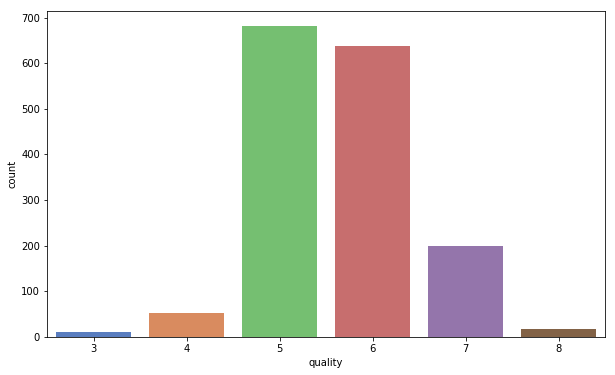

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(red_wine["quality"], palette="muted")
red_wine["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

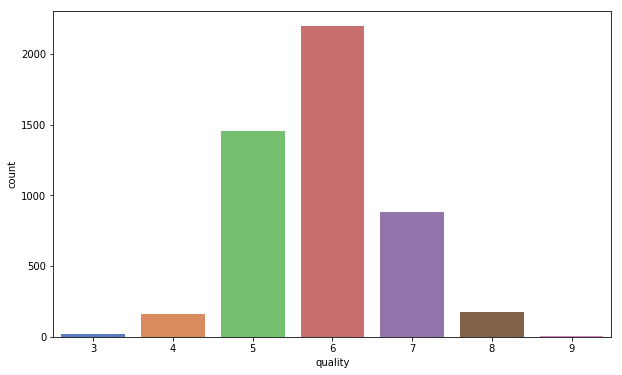

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(white_wine["quality"], palette="muted")
white_wine["quality"].value_counts()

Targets that have values between 0 and 10. However, there are no marks 0, 1, 2, 10 for all types of wine and 9 for red in the datset. The graphs also show that the classes are not balanced.

In [13]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
red_wine.describe().T

count    mean     std    min     25%     50%     75%      max
fixed acidity         1599.0   8.320   1.741  4.600   7.100   7.900   9.200   15.900
volatile acidity      1599.0   0.528   0.179  0.120   0.390   0.520   0.640    1.580
citric acid           1599.0   0.271   0.195  0.000   0.090   0.260   0.420    1.000
residual sugar        1599.0   2.539   1.410  0.900   1.900   2.200   2.600   15.500
chlorides             1599.0   0.087   0.047  0.012   0.070   0.079   0.090    0.611
free sulfur dioxide   1599.0  15.875  10.460  1.000   7.000  14.000  21.000   72.000
total sulfur dioxide  1599.0  46.468  32.895  6.000  22.000  38.000  62.000  289.000
density               1599.0   0.997   0.002  0.990   0.996   0.997   0.998    1.004
pH                    1599.0   3.311   0.154  2.740   3.210   3.310   3.400    4.010
sulphates             1599.0   0.658   0.170  0.330   0.550   0.620   0.730    2.000
alcohol               1599.0  10.423   1.066  8.400   9.500  10.200  11.100   14.900
quality               1599.0   5.636   0.808  3.000   5.000   6.000   6.000    8.000

In [14]:
white_wine.describe().T

count     mean     std    min      25%      50%      75%      max
fixed acidity         4898.0    6.855   0.844  3.800    6.300    6.800    7.300   14.200
volatile acidity      4898.0    0.278   0.101  0.080    0.210    0.260    0.320    1.100
citric acid           4898.0    0.334   0.121  0.000    0.270    0.320    0.390    1.660
residual sugar        4898.0    6.391   5.072  0.600    1.700    5.200    9.900   65.800
chlorides             4898.0    0.046   0.022  0.009    0.036    0.043    0.050    0.346
free sulfur dioxide   4898.0   35.308  17.007  2.000   23.000   34.000   46.000  289.000
total sulfur dioxide  4898.0  138.361  42.498  9.000  108.000  134.000  167.000  440.000
density               4898.0    0.994   0.003  0.987    0.992    0.994    0.996    1.039
pH                    4898.0    3.188   0.151  2.720    3.090    3.180    3.280    3.820
sulphates             4898.0    0.490   0.114  0.220    0.410    0.470    0.550    1.080
alcohol               4898.0   10.514   1.231  8.000    9.500   10.400   11.400   14.200
quality               4898.0    5.878   0.886  3.000    5.000    6.000    6.000    9.000

In [15]:
features_red = red_wine.loc[:, red_wine.columns != 'quality'].columns
features_red

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [16]:
features_white = white_wine.loc[:, white_wine.columns != 'quality'].columns
features_white

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

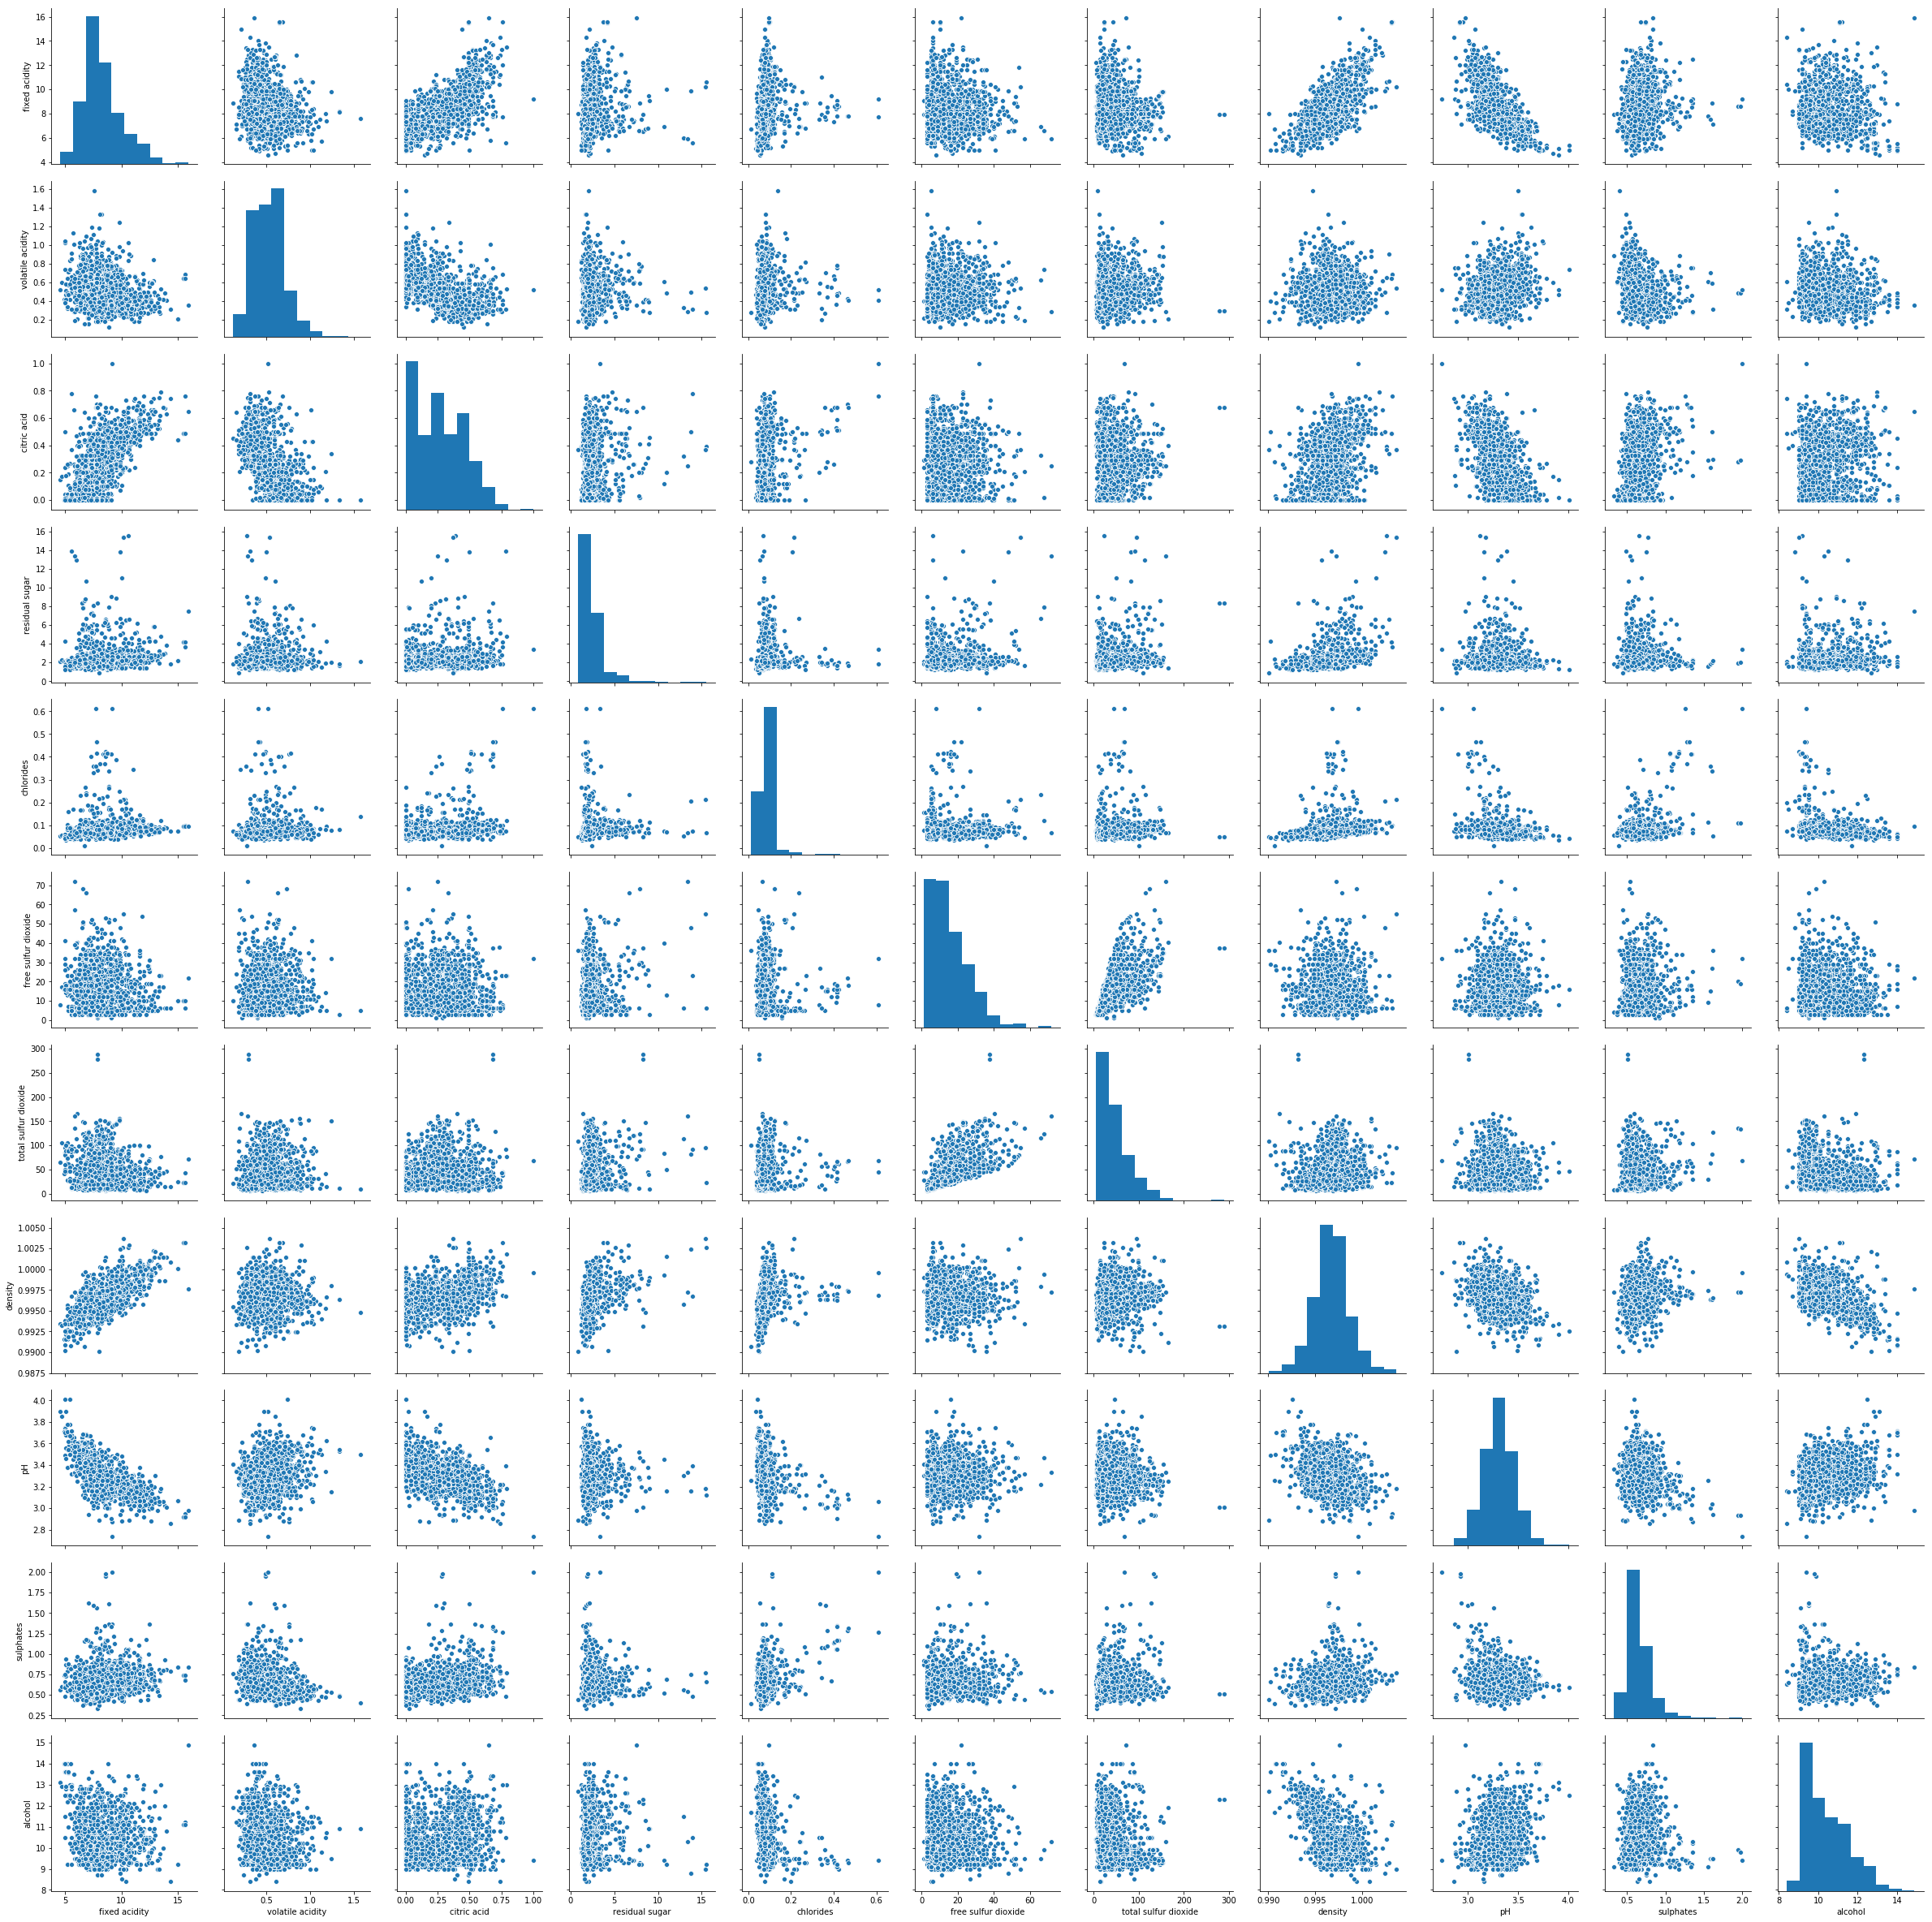

In [17]:
sns.pairplot(red_wine.loc[:,features_red], height=3)

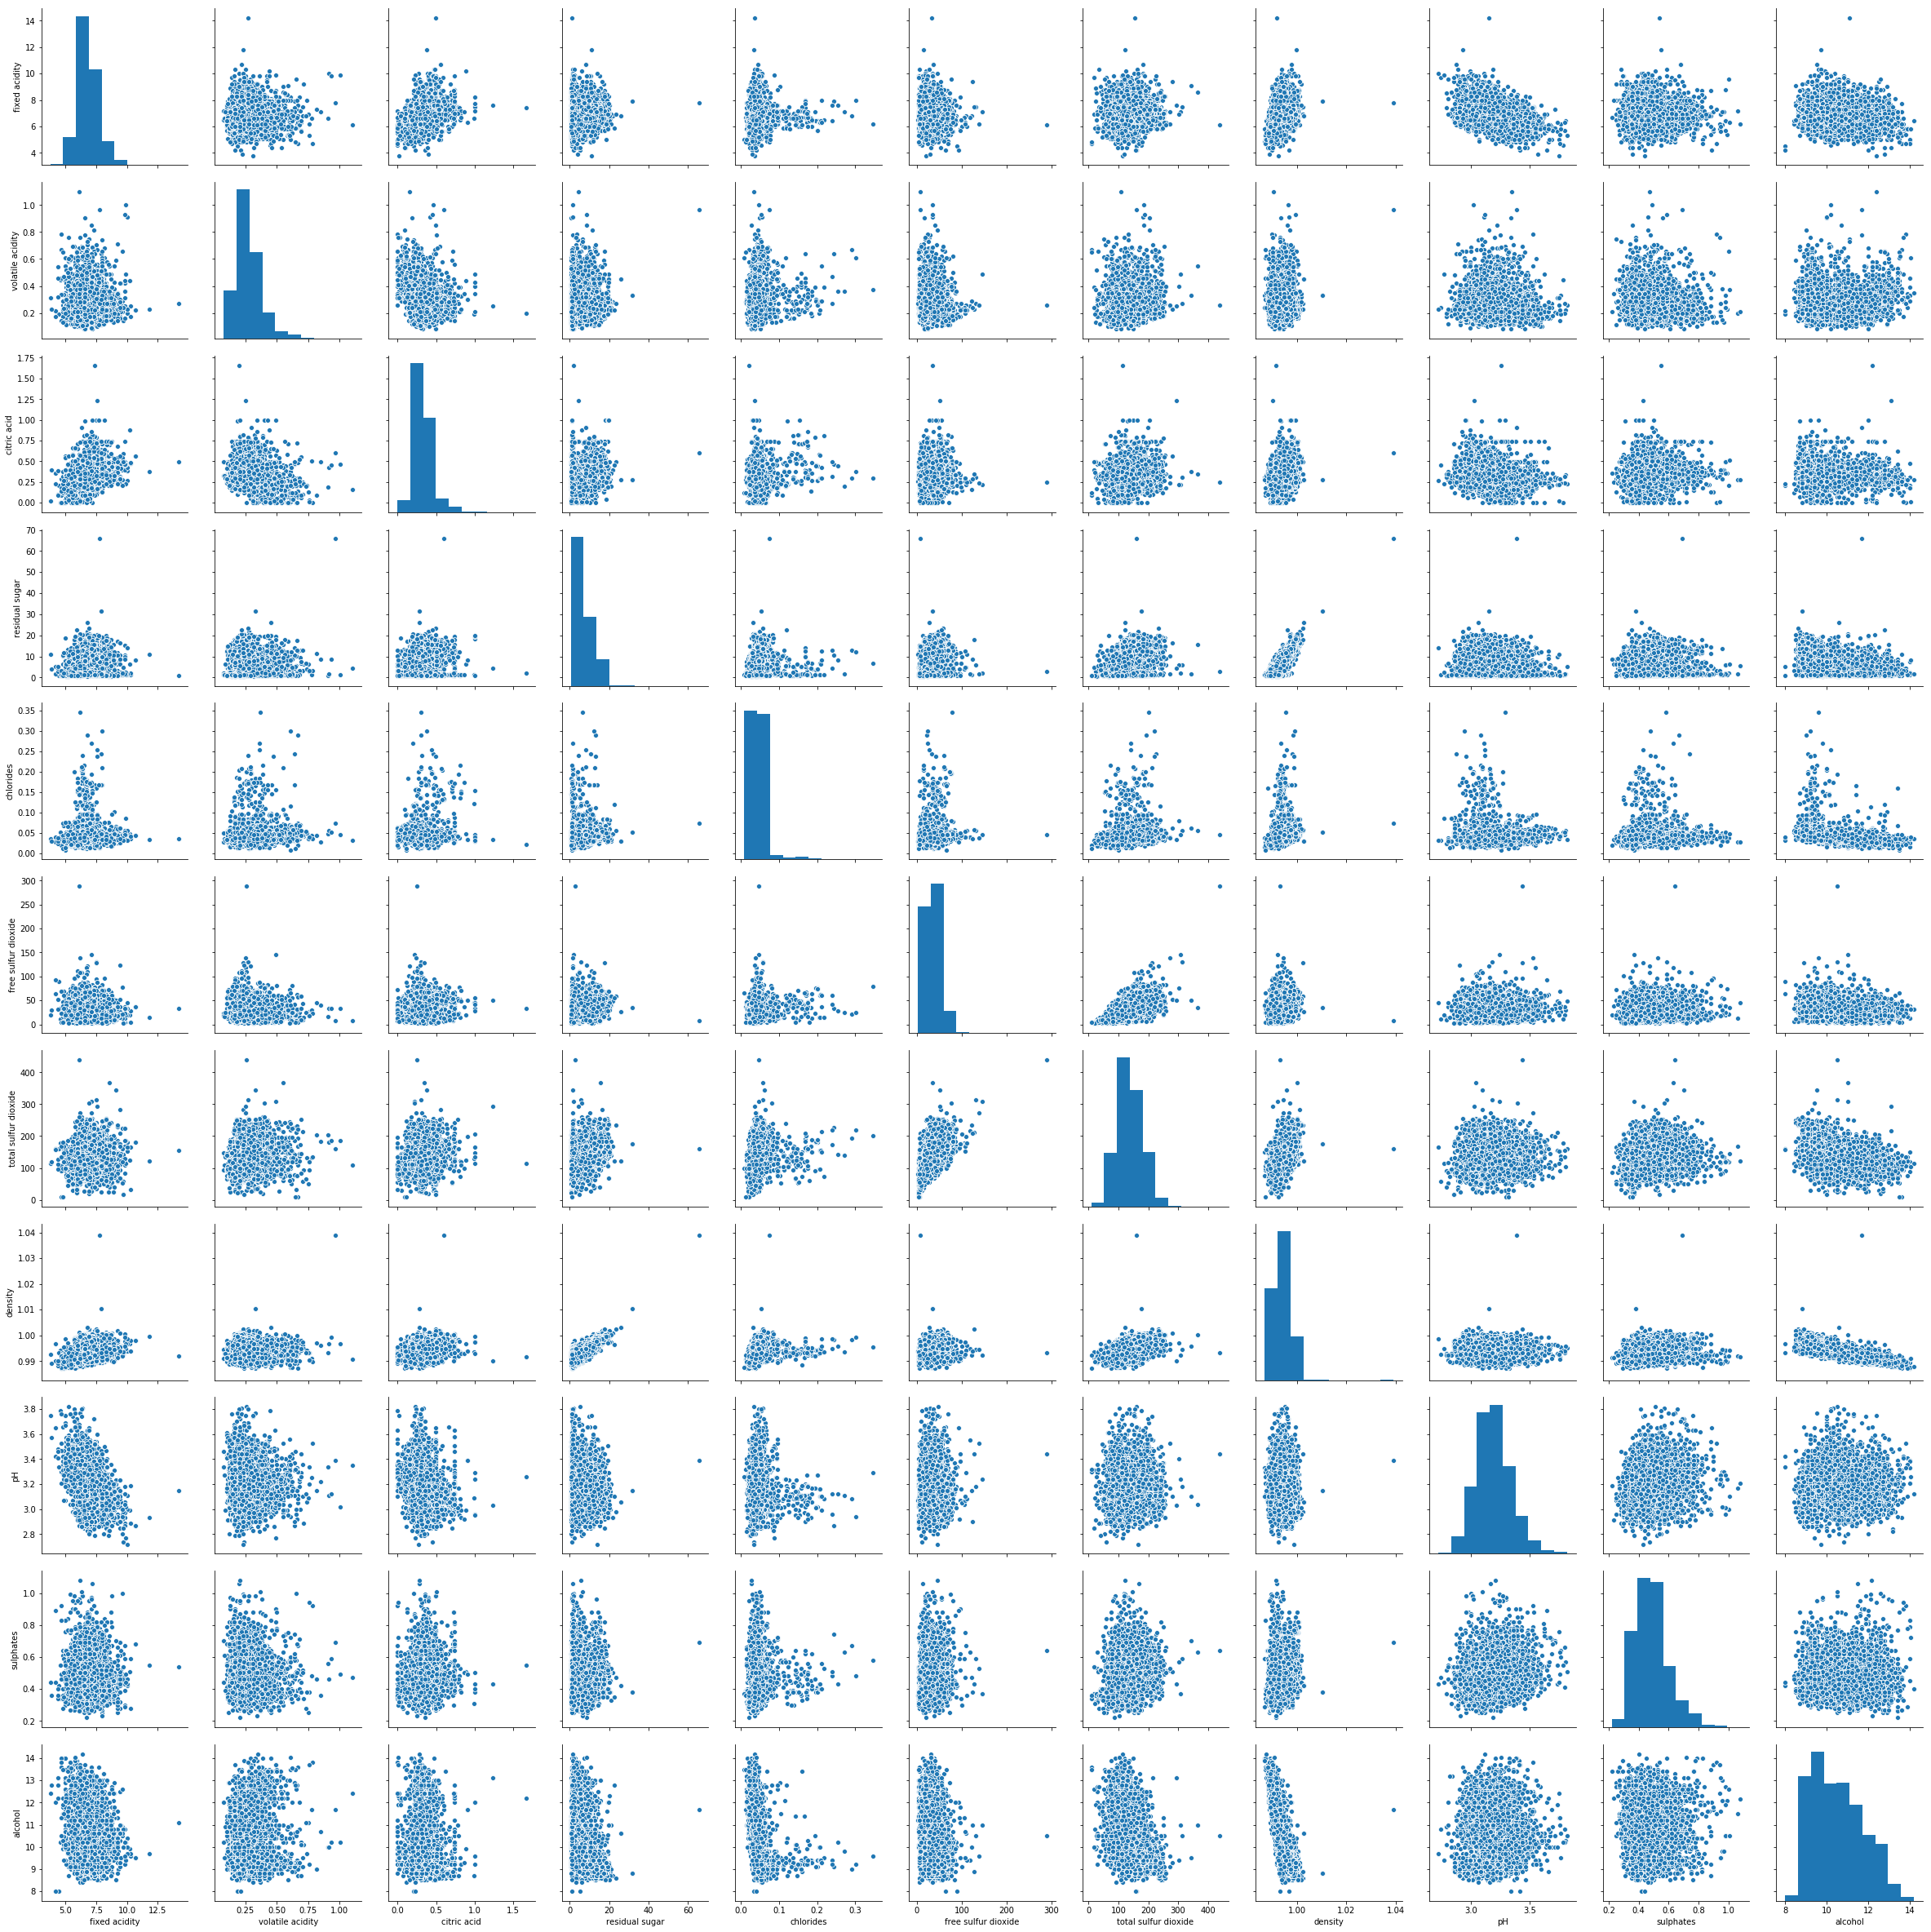

In [18]:
sns.pairplot(white_wine.loc[:,features_white], height=3)

On the pictures above, there is no obvious correlation and it also shows some outliers.

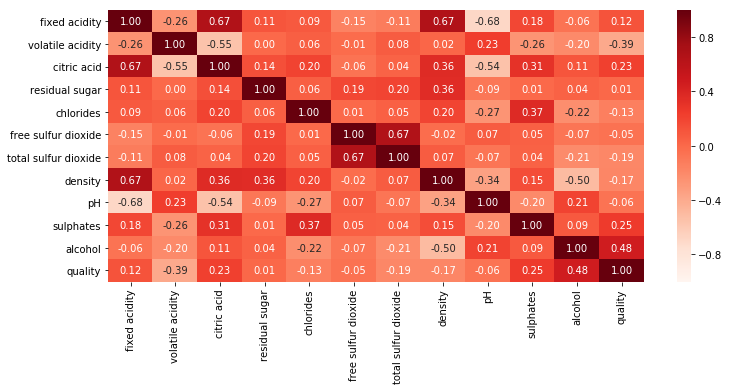

In [19]:
correlation_red = red_wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_red, annot=True, linewidths=0, vmin=-1, cmap="Reds", fmt='.2f')#, linewidths=.05

In [20]:
correlation_red['quality'].sort_values(ascending=False)

quality                 1.000
alcohol                 0.476
sulphates               0.251
citric acid             0.226
fixed acidity           0.124
residual sugar          0.014
free sulfur dioxide    -0.051
pH                     -0.058
chlorides              -0.129
density                -0.175
total sulfur dioxide   -0.185
volatile acidity       -0.391
Name: quality, dtype: float64

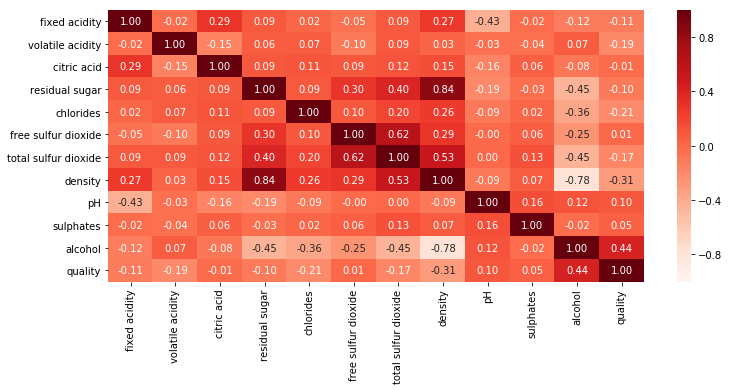

In [21]:
correlation_white = white_wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_white, annot=True, linewidths=0, vmin=-1, cmap="Reds", fmt='.2f')

In [22]:
correlation_white['quality'].sort_values(ascending=False)

quality                 1.000
alcohol                 0.436
pH                      0.099
sulphates               0.054
free sulfur dioxide     0.008
citric acid            -0.009
residual sugar         -0.098
fixed acidity          -0.114
total sulfur dioxide   -0.175
volatile acidity       -0.195
chlorides              -0.210
density                -0.307
Name: quality, dtype: float64

The correlation graphs show that the level of alcohol has the strongest positive correlation with the quality of wine. However, other data are poorly correlated. Therefore, there is no need to reduce the number of features. There is a positive correlation between residual sugar and density. This is due to the fact that the sugar (not fermented into alcohol) in the liquid makes it denser, thicker. Exactly the same explains the negative correlation between alcohol and residual sugar, as well as between alcohol and density, because the higher the alcohol content, the less residual sugar (all sugar fermented), and as a result, the lower density of the liquid. The same dependence between the pH index and acidity.

Using the TSNE algorithm, we will try to reduce the dimensionality of the data set to see how the data is located in the multidimensional space and whether the classes will be grouped by the quality of wine.

In [23]:
tsne_red = TSNE(n_components=2)
tsne_results_red = tsne_red.fit_transform(red_wine)
print('t-SNE done!')

t-SNE done!


Text(0.5, 1.0, 't-SNE results for red wine dataset')

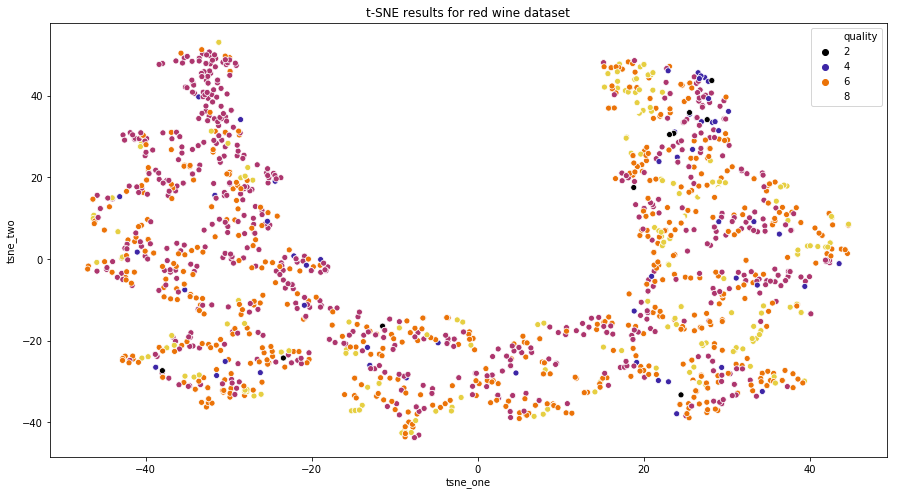

In [24]:
df_subset_red = pd.DataFrame()
df_subset_red['tsne_one'] = tsne_results_red[:,0]
df_subset_red['tsne_two'] = tsne_results_red[:,1]

plt.figure(figsize=(15,8))
sns.scatterplot(
    x='tsne_one', y='tsne_two',
    hue=red_wine['quality'],
    data=df_subset_red,
    palette='CMRmap')
plt.title('t-SNE results for red wine dataset')

In [25]:
tsne_white = TSNE(n_components=2)
tsne_results_white = tsne_white.fit_transform(white_wine)
print('t-SNE done!')

t-SNE done!


Text(0.5, 1.0, 't-SNE results for white wine dataset')

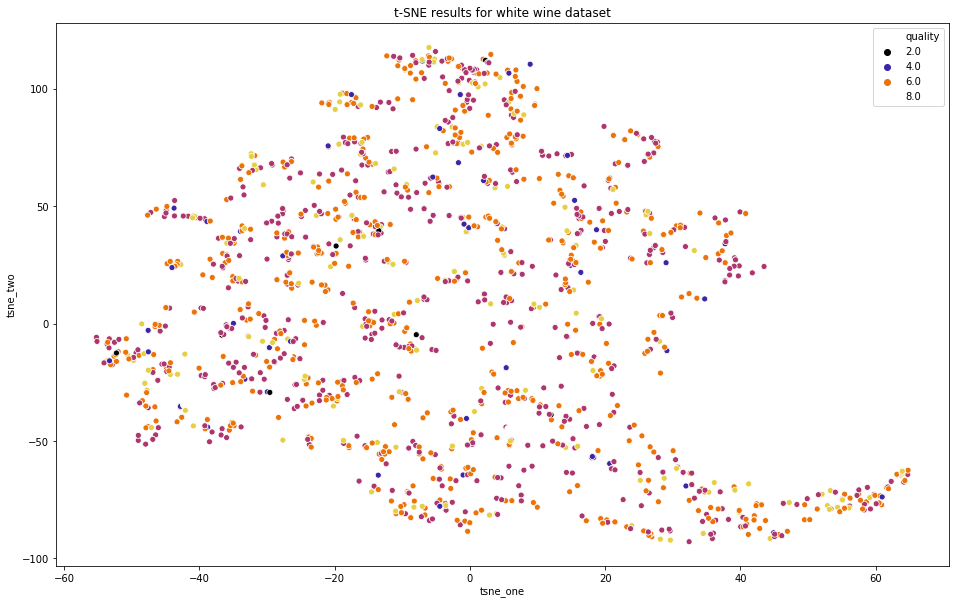

In [26]:
df_subset_white = pd.DataFrame()
df_subset_white['tsne_one'] = tsne_results_white[:,0]
df_subset_white['tsne_two'] = tsne_results_white[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_one', y='tsne_two',
    hue=red_wine['quality'],
    data=df_subset_white,
    palette='CMRmap')
plt.title('t-SNE results for white wine dataset')# CMRmap     style=red_wine['quality'], ,palette='CMRmap'

As you can see from the figures, it is difficult to intuitively divide classes into groups. It can be assumed that the classifiers will give low values of class definition accuracy.

### Conclusion    

* The primary analysis of the data has shown that the accuracy of classification may be low due to the imbalance of classes. 
* Since the results of most machine learning algorithms depend on the scale of the features' values, they should be normalized to ensure that the features contribute equally to the model prediction.
* Оutliers should also be removed so as not to mislead the training process of models.